In [145]:
import os
import logging
from tqdm import tqdm
from PIL import Image

In [146]:
# logging settings
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [147]:
def check_is_dir(path):
    if not os.path.isdir(path):
        raise ValueError(f"Provided path: {path} is not a directory.")
    return True

In [148]:
def filtered_images(list_of_files):
    valid_extensions = {".jpg", ".jpeg", ".png", ".webp"}
    return [
        file
        for file in list_of_files
        if any(file.endswith(ext) for ext in valid_extensions)
    ]

In [149]:
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

In [150]:
def read_images_from_dir(dir_path):
    check_is_dir(dir_path)
    files = os.listdir(dir_path)
    image_files = filtered_images(files)
    image_paths = [os.path.join(dir_path, file) for file in image_files]
    images = [load_image(image_path) for image_path in tqdm(image_paths)]
    logging.info(f"Load {len(images)} images from {dir_path}")
    return images

In [151]:
loaded_images = read_images_from_dir("raw_images/cat")

100%|██████████| 217/217 [00:05<00:00, 37.18it/s]
2024-06-11 10:28:10,717 - INFO - Load 217 images from raw_images/cat


In [152]:
def max_resolution_rescale(image, max_width, max_height):
    width, height = image.size
    if width > max_width or height > max_height:
        ratio = min(max_width / width, max_height / height)
        new_width = int(width * ratio)
        new_height = int(height * ratio)
        image = image.resize((new_width, new_height), Image.LANCZOS)
    return image

In [153]:
max_size = 1024

resized_images = list(
    map(lambda x: max_resolution_rescale(x, max_size, max_size), tqdm(loaded_images))
)

100%|██████████| 217/217 [00:05<00:00, 43.18it/s]


In [154]:
def min_resolution_filter(image, min_width, min_height):
    width, height = image.size
    return width >= min_width and height >= min_height

In [155]:
min_size = 224
filtered_images = list(
    filter(
        lambda x: max_resolution_rescale(x, min_size, min_size), tqdm(resized_images)
    )
)

100%|██████████| 217/217 [00:00<00:00, 268.41it/s]


In [156]:
len(filtered_images)

217

In [157]:
import matplotlib.pyplot as plt

In [158]:
def plot_image(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()

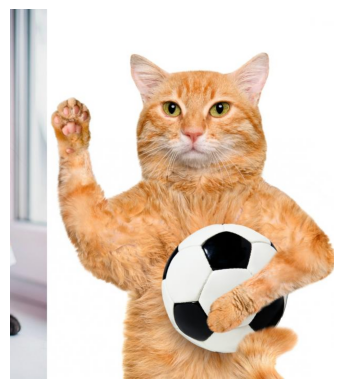

In [159]:
plot_image(filtered_images[14])

In [160]:
def center_crop(image, new_width, new_height):
    width, height = image.size
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    cropped_image = image.crop((left, top, right, bottom))
    logging.info(f"Center cropped image to {new_width}x{new_height}")
    return cropped_image

In [161]:
min_size = 224

2024-06-11 10:28:16,919 - INFO - Center cropped image to 224x224


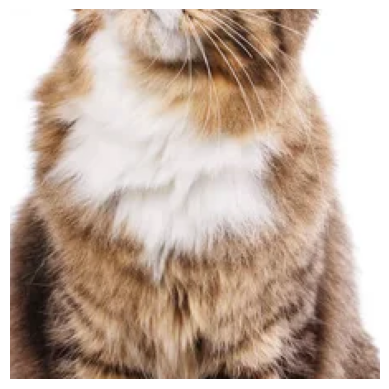

In [162]:
plot_image(center_crop(filtered_images[17], min_size, min_size))

In [163]:
from smartcrop import detect

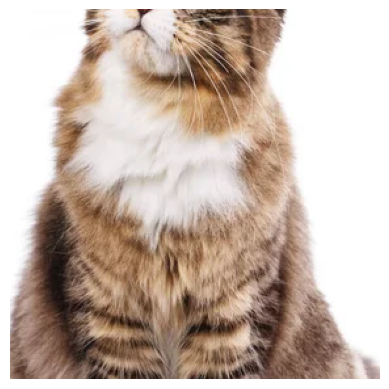

In [164]:
cropped_image = detect(filtered_images[17], square=True)
plot_image(cropped_image)

In [165]:
cropped_images = list(map(lambda x: detect(x, square=True), tqdm(filtered_images)))

100%|██████████| 217/217 [00:12<00:00, 17.80it/s]


In [166]:
import numpy as np

In [167]:
def save_image(image, save_path):
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)
    if not isinstance(image, Image.Image):
        raise ValueError("Input image must be a numpy array or PIL image")

    if image.mode != "RGB":
        image = image.convert("RGB")

    image.save(save_path)
    logging.info(f"Saved image to {save_path}")

In [168]:
def create_directory(dir_path):
    if not os.path.isdir(dir_path):
        os.makedirs(dir_path)
        print(f"Directory created: {dir_path}")
    else:
        print(f"Directory already exists {dir_path}")

In [169]:
def save_images_to_dir(images, dir_path):
    create_directory(dir_path)
    check_is_dir(dir_path)

    for i, image in tqdm(enumerate(images, 1)):
        save_path = os.path.join(dir_path, f"image_{i}.jpg")
        save_image(image, save_path)
    return True

In [170]:
save_images_to_dir(cropped_images, "processed_images/cat")

Directory created: processed_images/cat


0it [00:00, ?it/s]2024-06-11 10:28:29,481 - INFO - Saved image to processed_images/cat\image_1.jpg
2024-06-11 10:28:29,485 - INFO - Saved image to processed_images/cat\image_2.jpg
2024-06-11 10:28:29,487 - INFO - Saved image to processed_images/cat\image_3.jpg
2024-06-11 10:28:29,494 - INFO - Saved image to processed_images/cat\image_4.jpg
2024-06-11 10:28:29,498 - INFO - Saved image to processed_images/cat\image_5.jpg
2024-06-11 10:28:29,501 - INFO - Saved image to processed_images/cat\image_6.jpg
2024-06-11 10:28:29,509 - INFO - Saved image to processed_images/cat\image_7.jpg
2024-06-11 10:28:29,518 - INFO - Saved image to processed_images/cat\image_8.jpg
2024-06-11 10:28:29,528 - INFO - Saved image to processed_images/cat\image_9.jpg
2024-06-11 10:28:29,534 - INFO - Saved image to processed_images/cat\image_10.jpg
2024-06-11 10:28:29,537 - INFO - Saved image to processed_images/cat\image_11.jpg
2024-06-11 10:28:29,544 - INFO - Saved image to processed_images/cat\image_12.jpg
2024-06

True